<a href="https://colab.research.google.com/github/AdamHuang0402/MLclass0423/blob/master/Dog_cat_convnets_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

'2.4.3'

## Downloading the data

The cats vs. dogs dataset that we will use isn't packaged with Keras. It was made available by Kaggle.com as part of a computer vision 
competition in late 2013, back when convnets weren't quite mainstream. You can download the original dataset at: 
`https://www.kaggle.com/c/dogs-vs-cats/data` (you will need to create a Kaggle account if you don't already have one -- don't worry, the 
process is painless).

The pictures are medium-resolution color JPEGs. They look like this:

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

In [ ]:
import os, shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 修改
import zipfile
f = zipfile.ZipFile("/content/drive/My Drive/deeplearning/train.zip")
f.extractall("./datasets")
original_dataset_dir = "./datasets"

In [ ]:
import glob
import pandas as pd
catfs = glob.glob("datasets/train/cat.*.[jJ][pP][gG]")
catans = [0] * len(catfs)
dogfs = glob.glob("datasets/train/dog.*.[jJ][pP][gG]")
dogans = [1] * len(dogfs)
df = pd.DataFrame({
    "path":catfs + dogfs,
    "target":catans + dogans
})
df

,path,target
0,datasets/train/cat.3153.jpg,0
1,datasets/train/cat.3312.jpg,0
2,datasets/train/cat.795.jpg,0
3,datasets/train/cat.4484.jpg,0
4,datasets/train/cat.9764.jpg,0
...,...,...
24995,datasets/train/dog.2663.jpg,1
24996,datasets/train/dog.10818.jpg,1
24997,datasets/train/dog.8218.jpg,1
24998,datasets/train/dog.3566.jpg,1


In [ ]:
# 創建資料夾
# The path to the directory where the original
# dataset was uncompressed
## original_dataset_dir = '/Users/fchollet/Downloads/kaggle_original_data'
original_dataset_dir = 'datasets/train'

# The directory where we will
# store our smaller dataset
base_dir = "./cats_and_dogs_small"

if os.path.exists(base_dir):
    if os.path.isdir(base_dir):
        print(base_dir + '資料夾存在')
    else:
        print(base_dir + '不是資料夾')
else:
    print(base_dir + '不存在')
    os.mkdir(base_dir)
    print("完成創建資料夾: " + base_dir)


# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
if os.path.exists(train_dir):
    if os.path.isdir(train_dir):
        print(train_dir + '資料夾存在')
    else:
        print(train_dir + '不是資料夾')
else:
    print(train_dir + '不存在')
    os.mkdir(train_dir)
    print("完成創建資料夾: " + train_dir)



validation_dir = os.path.join(base_dir, 'validation')
if os.path.exists(validation_dir):
    if os.path.isdir(validation_dir):
        print(validation_dir + '資料夾存在')
    else:
        print(validation_dir + '不是資料夾')
else:
    print(validation_dir + '不存在')
    os.mkdir(validation_dir)
    print("完成創建資料夾: " + validation_dir)


test_dir = os.path.join(base_dir, 'test')
if os.path.exists(test_dir):
    if os.path.isdir(test_dir):
        print(test_dir + '資料夾存在')
    else:
        print(test_dir + '不是資料夾')
else:
    print(test_dir + '不存在')
    os.mkdir(test_dir)
    print("完成創建資料夾: " + test_dir)


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if os.path.exists(train_cats_dir):
    if os.path.isdir(train_cats_dir):
        print(train_cats_dir + '資料夾存在')
    else:
        print(train_cats_dir + '不是資料夾')
else:
    print(train_cats_dir + '不存在')
    os.mkdir(train_cats_dir)
    print("完成創建資料夾: " + train_cats_dir)


# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if os.path.exists(train_dogs_dir):
    if os.path.isdir(train_dogs_dir):
        print(train_dogs_dir + '資料夾存在')
    else:
        print(train_dogs_dir + '不是資料夾')
else:
    print(train_dogs_dir + '不存在')
    os.mkdir(train_dogs_dir)
    print("完成創建資料夾: " + train_dogs_dir)


# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if os.path.exists(validation_cats_dir):
    if os.path.isdir(validation_cats_dir):
        print(validation_cats_dir + '資料夾存在')
    else:
        print(validation_cats_dir + '不是資料夾')
else:
    print(validation_cats_dir + '不存在')
    os.mkdir(validation_cats_dir)
    print("完成創建資料夾: " + validation_cats_dir)


# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if os.path.exists(validation_dogs_dir):
    if os.path.isdir(validation_dogs_dir):
        print(validation_dogs_dir + '資料夾存在')
    else:
        print(validation_dogs_dir + '不是資料夾')
else:
    print(validation_dogs_dir + '不存在')
    os.mkdir(validation_dogs_dir)
    print("完成創建資料夾: " + validation_dogs_dir)


# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if os.path.exists(test_cats_dir):
    if os.path.isdir(test_cats_dir):
        print(test_cats_dir + '資料夾存在')
    else:
        print(test_cats_dir + '不是資料夾')
else:
    print(test_cats_dir + '不存在')
    os.mkdir(test_cats_dir)
    print("完成創建資料夾: " + test_cats_dir)


# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if os.path.exists(test_dogs_dir):
    if os.path.isdir(test_dogs_dir):
        print(test_dogs_dir + '資料夾存在')
    else:
        print(test_dogs_dir + '不是資料夾')
else:
    print(test_dogs_dir + '不存在')
    os.mkdir(test_dogs_dir)
    print("完成創建資料夾: " + test_dogs_dir)




./cats_and_dogs_small資料夾存在
./cats_and_dogs_small/train資料夾存在
./cats_and_dogs_small/validation資料夾存在
./cats_and_dogs_small/test資料夾存在
./cats_and_dogs_small/train/cats資料夾存在
./cats_and_dogs_small/train/dogs資料夾存在
./cats_and_dogs_small/validation/cats資料夾存在
./cats_and_dogs_small/validation/dogs資料夾存在
./cats_and_dogs_small/test/cats資料夾存在
./cats_and_dogs_small/test/dogs資料夾存在


In [ ]:
print("original_dataset_dir : "+ original_dataset_dir)
print("train_cats_dir : "+ train_cats_dir)

original_dataset_dir : datasets/train
train_cats_dir : ./cats_and_dogs_small/train/cats


In [ ]:
# 複製檔案，並分配訓練，測試，驗證檔案
# Copy first cat images to train_cats_dir
fnames = ["cat.{}.jpg".format(i) for i in range(5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
print("src: "+src)
print("train_cats_dir: "+dst)

# # Copy next cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(5000, 7500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
print("src: "+src)
print("validation_cats_dir: "+dst)
    
# # Copy next cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(7500, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
print("src: "+src)
print("test_cats_dir: "+dst)
    
# # Copy first dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
print("src: "+src)
print("train_dogs_dir: "+dst)
    
# # Copy next dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(5000, 7500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
print("src: "+src)
print("validation_dogs_dir: "+dst)
    
# # Copy next dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(7500, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
print("src: "+src)
print("test_dogs_dir: "+dst)

src: datasets/train/cat.4999.jpg
train_cats_dir: ./cats_and_dogs_small/train/cats/cat.4999.jpg
src: datasets/train/cat.7499.jpg
validation_cats_dir: ./cats_and_dogs_small/validation/cats/cat.7499.jpg
src: datasets/train/cat.9999.jpg
test_cats_dir: ./cats_and_dogs_small/test/cats/cat.9999.jpg
src: datasets/train/dog.4999.jpg
train_dogs_dir: ./cats_and_dogs_small/train/dogs/dog.4999.jpg
src: datasets/train/dog.7499.jpg
validation_dogs_dir: ./cats_and_dogs_small/validation/dogs/dog.7499.jpg
src: datasets/train/dog.9999.jpg
test_dogs_dir: ./cats_and_dogs_small/test/dogs/dog.9999.jpg


As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 5000


In [ ]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 5000


In [ ]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 3000


In [ ]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 3000


In [ ]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 3000


In [ ]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 3000


In [ ]:
# convnets 框架
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# Data preprocessing
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
# 訓練模型
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 9s 87ms/step - loss: 0.6952 - acc: 0.5150 - val_loss: 0.6881 - val_acc: 0.5060
Epoch 2/30
100/100 [==============================] - 9s 87ms/step - loss: 0.6770 - acc: 0.5885 - val_loss: 0.6734 - val_acc: 0.5390
Epoch 3/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6414 - acc: 0.6360 - val_loss: 0.6205 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 9s 87ms/step - loss: 0.6123 - acc: 0.6655 - val_loss: 0.5910 - val_acc: 0.6850
Epoch 5/30
100/100 [==============================] - 9s 85ms/step - loss: 0.5813 - acc: 0.6890 - val_loss: 0.5563 - val_acc: 0.7060
Epoch 6/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5708 - acc: 0.6965 - val_loss: 0.6130 - val_acc: 0.6520
Epoch 7/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5568 - acc: 0.7115 - val_loss: 0.5548 - val_acc: 

In [ ]:
# 儲存模型
model.save('cats_and_dogs_small_1.h5')

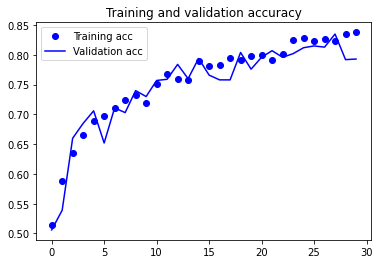

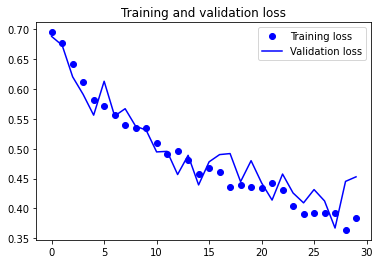

In [ ]:
# plot 訓練過程
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 使用資料擴增
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures 
vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal 
asymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Let's take a look at our augmented images:

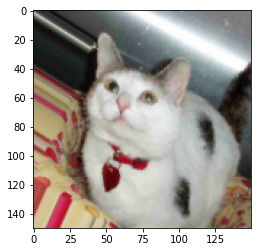

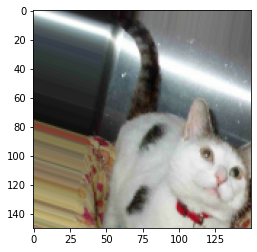

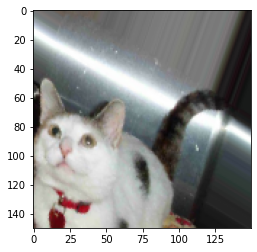

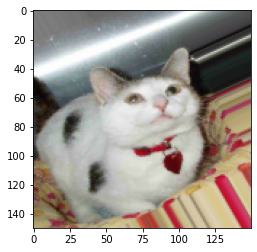

In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
#　重載框架，以訓練新的參數
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# Data preprocessing and training model

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)


Found 10000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 27s 269ms/step - loss: 0.6921 - acc: 0.5316 - val_loss: 0.7078 - val_acc: 0.5106
Epoch 2/100
100/100 [==============================] - 27s 270ms/step - loss: 0.6888 - acc: 0.5503 - val_loss: 0.6718 - val_acc: 0.5913
Epoch 3/100
100/100 [==============================] - 27s 271ms/step - loss: 0.6785 - acc: 0.5706 - val_loss: 0.6553 - val_acc: 0.6062
Epoch 4/100
100/100 [==============================] - 27s 267ms/step - loss: 0.6602 - acc: 0.6022 - val_loss: 0.6440 - val_acc: 0.6106
Epoch 5/100
100/100 [==============================] - 27s 266ms/step - loss: 0.6550 - acc: 0.6014 - val_loss: 0.6200 - val_acc: 0.6544
Epoch 6/100
100/100 [==============================] - 27s 269ms/step - loss: 0.6416 - acc: 0.6275 - val_loss: 0.7228 - val_acc: 0.5163
Epoch 7/100
100/100 [==============================] - 27s 267ms/step - loss: 0.6275 - acc: 0.6450 

In [ ]:
model.save('cats_and_dogs_small_2.h5')

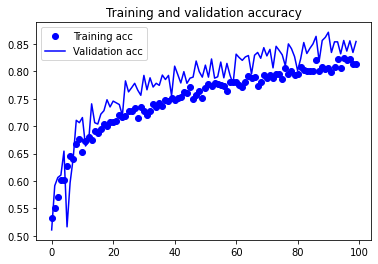

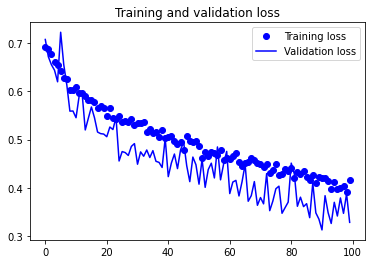

In [ ]:
# plot
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()